In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
data=pd.read_excel("data sheet - himanshu.xlsx")

In [28]:
data.head()

,source,USER id,narration,valueDate,amount,type,category,subcategory,merchant name
0,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-09-11,1.0,DEBIT,PEER TO PEER TRANSFER,UPI,NaN
1,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-11-16,1000.0,DEBIT,PEER TO PEER TRANSFER,UPI,NaN
2,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2022-03-17,800.0,DEBIT,PEER TO PEER TRANSFER,UPI,NaN
3,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-11-13,30.0,DEBIT,PEER TO PEER TRANSFER,UPI,NaN
4,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2022-03-30,10000.0,DEBIT,PEER TO PEER TRANSFER,UPI,NaN


In [29]:
data=data.sort_values(by='valueDate',ascending=True)

In [30]:
def fun_dataprep(df):
    df['year'] = pd.to_datetime(df['valueDate']).dt.year
    df['month'] = pd.to_datetime(df['valueDate']).dt.month
    df['day'] = pd.to_datetime(df['valueDate']).dt.day
    df['week_day'] = pd.to_datetime(df['valueDate']).dt.weekday
    return df

In [31]:
data=fun_dataprep(data)
data

,source,USER id,narration,valueDate,amount,type,category,subcategory,merchant name,year,month,day,week_day
3892,XYZ,4337e7f26e44e09d628308dd9870c9ad,UPI/114466228607/Payment from Ph/kreditbee@ind...,2021-05-24,3979.0,DEBIT,LOANS,EMI,KREDITBEE,2021,5,24,0
1808,ABC,5fd6c8ba-077e-4f3b-80dd-aea17d51cb11,POS 652166XXXXXX4757 SAROJ,2021-05-29,205.0,DEBIT,UNCATEGORIZED,-,NaN,2021,5,29,5
1997,ABC,5fd6c8ba-077e-4f3b-80dd-aea17d51cb11,UPI,2021-05-29,5000.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,2021,5,29,5
236,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-05-31,100.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,2021,5,31,0
1094,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-05-31,100.0,DEBIT,PEER TO PEER TRANSFER,UPI,NaN,2021,5,31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3904,XYZ,4b286bec51c2cce84ccc61fb6af87bac,UPI-VINEY GOYAL-ADDFI.55550119040291@FBL-FDRL0...,2022-07-29,235.0,DEBIT,PEER TO PEER TRANSFER,UPI,NaN,2022,7,29,4
3902,XYZ,4b286bec51c2cce84ccc61fb6af87bac,.IMPS P2P 216517304485#14/06/2022 140622-CDT22...,2022-07-30,5.9,DEBIT,PEER TO PEER TRANSFER,BANK TRANSFER,NaN,2022,7,30,5
4031,XYZ,d4d2161a27958cfbc918ece483d1344c,MMT/IMPS/221215343700/W/GADGET ZON/HDFC Bank,2022-08-01,100000.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,GADGET ZONE,2022,8,1,0
3991,XYZ,d4d2161a27958cfbc918ece483d1344c,MMT/IMPS/221203478831/30020160 by USE/PRAKASH /S,2022-08-01,1500.0,DEBIT,PEER TO PEER TRANSFER,BANK TRANSFER,NaN,2022,8,1,0


In [32]:
user_wise_data=[]
for i in data["USER id"].value_counts().index:
    user_wise_data.append(data[data["USER id"]==i])

In [33]:
dt_credit=[]
dt_debit=[]

for i in user_wise_data:
    dt_credit.append(i[i["type"]=="CREDIT"])
    dt_debit.append(i[i["type"]=="DEBIT"])

In [34]:
d_credit_category=[]
d_debit_category=[]

In [35]:
for i in dt_credit:
    res={}
    for j in i["category"].value_counts().index:
        res[j]=i[i["category"]==j]
    d_credit_category.append(res)

In [36]:
for i in dt_debit:
    res={}
    for j in i["category"].value_counts().index:
        res[j]=i[i["category"]==j]
    d_debit_category.append(res)

In [37]:
for i in range(len(d_credit_category)):  # dictionary
    for j in d_credit_category[i].keys():
        v=d_credit_category[i][j]
        res={}
        for r in v["subcategory"].value_counts().index:
            res[r]=v[v["subcategory"]==r]
        d_credit_category[i][j]=res   
        

In [38]:
for i in range(len(d_debit_category)):  # dictionary
    for j in d_debit_category[i].keys():
        v=d_debit_category[i][j]
        res={}
        for r in v["subcategory"].value_counts().index:
            res[r]=v[v["subcategory"]==r]
        d_debit_category[i][j]=res   

In [39]:
d_credit_category

[{'OTHER INCOME': {'OTHER DEPOSITS':      source                                USER id  \
   236      ABC  5d742f0e-30e0-437f-8aa9-49cdef0beff5   
   1602     ABC  5d742f0e-30e0-437f-8aa9-49cdef0beff5   
   789      ABC  5d742f0e-30e0-437f-8aa9-49cdef0beff5   
   428      ABC  5d742f0e-30e0-437f-8aa9-49cdef0beff5   
   1263     ABC  5d742f0e-30e0-437f-8aa9-49cdef0beff5   
   ...      ...                                   ...   
   1032     ABC  5d742f0e-30e0-437f-8aa9-49cdef0beff5   
   1208     ABC  5d742f0e-30e0-437f-8aa9-49cdef0beff5   
   979      ABC  5d742f0e-30e0-437f-8aa9-49cdef0beff5   
   1080     ABC  5d742f0e-30e0-437f-8aa9-49cdef0beff5   
   835      ABC  5d742f0e-30e0-437f-8aa9-49cdef0beff5   
   
                                                 narration  valueDate   amount  \
   236                                                 UPI 2021-05-31    100.0   
   1602                                                UPI 2021-06-10  20000.0   
   789                          

# **Category :**

In [40]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [41]:
def main_py(EMI_debit):
    amount_col="amount"
    amount_tolerance=0.5
    def fun2(x):
        day=x["day"]
        test=x["freq"]
        if day!=31:
            test=test[(test["day"]>=day-10) & (test["day"]<=day+10)]
        else:
            test=test[(test["day"]>=day-10) & (test["day"]<=10)]
            
        return len(test)

    try:

        EMI_debit['freq'] = EMI_debit[amount_col].map(lambda x: (EMI_debit[(EMI_debit[amount_col] >= x - x * amount_tolerance) & 
                        (EMI_debit[amount_col] <= x + x * amount_tolerance)] ))
        EMI_debit['length']= EMI_debit.apply(lambda x : fun2(x), axis=1)
        EMI_debit["recurring"]=EMI_debit["length"].map(lambda x: "Recurring" if x>=3 else "Non recurring")

        return EMI_debit

    except:
        return pd.DataFrame()

In [42]:
final=pd.DataFrame()

In [43]:
for i in d_credit_category:
    for j in i.keys():
        v=i[j]
        for k in v.keys():
            final=pd.concat([final,main_py(v[k])],axis=0)

In [44]:
for i in d_debit_category:
    for j in i.keys():
        v=i[j]
        for k in v.keys():
            final=pd.concat([final,main_py(v[k])],axis=0)

In [45]:
final

,source,USER id,narration,valueDate,amount,type,category,subcategory,merchant name,year,month,day,week_day,freq,length,recurring
236,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-05-31,100.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,2021,5,31,0,source USER...,0,Non recurring
1602,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-06-10,20000.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,2021,6,10,3,source USE...,30,Recurring
789,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-06-11,1000.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,2021,6,11,4,source USER...,93,Recurring
428,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-06-14,300.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,2021,6,14,0,source USER...,41,Recurring
1263,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-06-16,4000.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,2021,6,16,2,source USE...,71,Recurring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3889,XYZ,4337e7f26e44e09d628308dd9870c9ad,UPI/136560439413/UPI Payment/q00236891@ybl//IC...,2021-12-31,126.0,DEBIT,PEER TO PEER TRANSFER,UPI,NaN,2021,12,31,4,source USER id...,0,Non recurring
3888,XYZ,4337e7f26e44e09d628308dd9870c9ad,UPI/207417539513/UPI/Q24906658@ybl/Bank of Ind...,2022-03-15,85.0,DEBIT,PEER TO PEER TRANSFER,UPI,NaN,2022,3,15,1,source USER id...,1,Non recurring
3885,XYZ,4337e7f26e44e09d628308dd9870c9ad,UPI/214833153969/UPI/q83345336@ybl/Bank of Ind...,2022-05-30,30.0,DEBIT,PEER TO PEER TRANSFER,UPI,NaN,2022,5,30,0,source USER id...,1,Non recurring
3897,XYZ,4337e7f26e44e09d628308dd9870c9ad,BIL/000373633558/ICICI BANK CREDIT CA/43158102...,2022-04-12,8000.0,DEBIT,UTILITIES AND BILLS,CREDIT CARD PAYMENT,NaN,2022,4,12,1,source USER id...,1,Non recurring


In [46]:
final.sort_index(ascending=True,inplace=True)

In [47]:
final

,source,USER id,narration,valueDate,amount,type,category,subcategory,merchant name,year,month,day,week_day,freq,length,recurring
0,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-09-11,1.0,DEBIT,PEER TO PEER TRANSFER,UPI,NaN,2021,9,11,5,source USE...,3,Recurring
1,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-11-16,1000.0,DEBIT,PEER TO PEER TRANSFER,UPI,NaN,2021,11,16,1,source USE...,150,Recurring
2,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2022-03-17,800.0,DEBIT,PEER TO PEER TRANSFER,UPI,NaN,2022,3,17,3,source USE...,147,Recurring
3,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-11-13,30.0,DEBIT,PEER TO PEER TRANSFER,UPI,NaN,2021,11,13,5,source USE...,138,Recurring
4,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2022-03-30,10000.0,DEBIT,PEER TO PEER TRANSFER,UPI,NaN,2022,3,30,2,source USE...,33,Recurring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4028,XYZ,d4d2161a27958cfbc918ece483d1344c,MMT/IMPS/220300754301/ppp/VANAMADAYU/Bank of B...,2022-07-22,34000.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,2022,7,22,4,source USER id...,2,Non recurring
4029,XYZ,d4d2161a27958cfbc918ece483d1344c,MMT/IMPS/213612215660/opentxn53745386/Dee /F,2022-02-24,49313.0,DEBIT,UTILITIES AND BILLS,CREDIT CARD PAYMENT,NaN,2022,2,24,3,source USER id...,2,Non recurring
4030,XYZ,d4d2161a27958cfbc918ece483d1344c,MMT/IMPS/211718997626/opentxn51329887/Mir /U,2021-07-09,80000.0,DEBIT,UTILITIES AND BILLS,CREDIT CARD PAYMENT,NaN,2021,7,9,4,source USER id...,1,Non recurring
4031,XYZ,d4d2161a27958cfbc918ece483d1344c,MMT/IMPS/221215343700/W/GADGET ZON/HDFC Bank,2022-08-01,100000.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,GADGET ZONE,2022,8,1,0,source USER id...,1,Non recurring


In [48]:
final["recurring"].value_counts()

Recurring        3631
Non recurring     402
Name: recurring, dtype: int64

In [49]:
final.to_excel("result3.xlsx")

<AxesSubplot:xlabel='valueDate', ylabel='amount'>

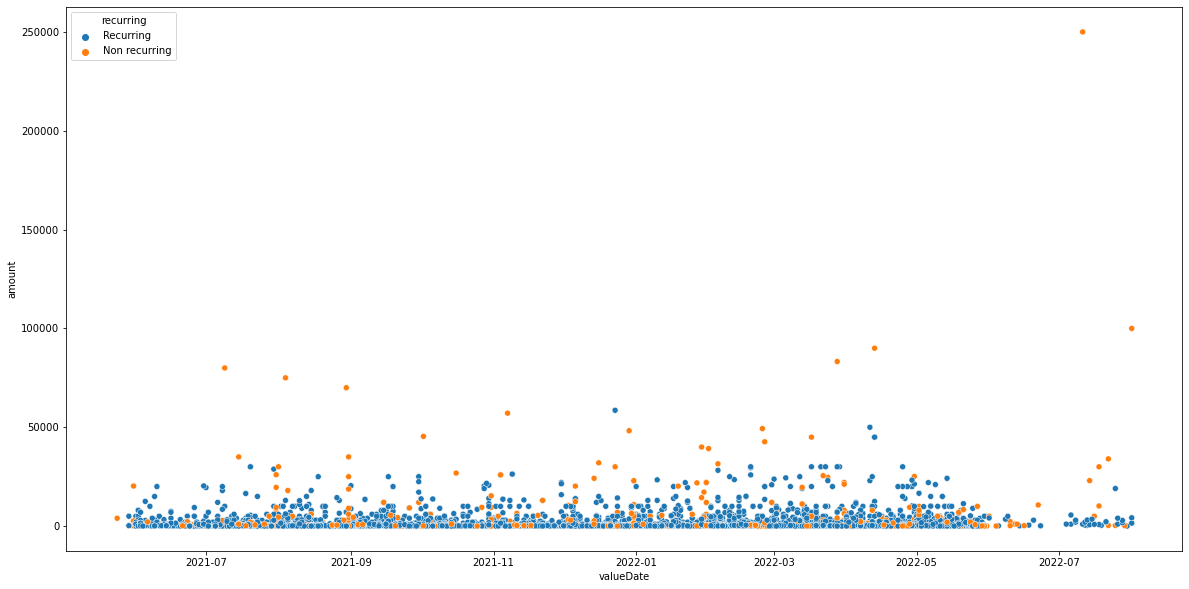

In [50]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=final,x="valueDate",y="amount",hue="recurring",palette="tab10")